# Bagging

What if you have already found the best model and can no longer improve the accuracy of the model? In this case, you need to apply more advanced machine learning techniques, which can be combined with the word “ensembles”. The ensemble is a kind of collection, the parts of which form a single whole. From everyday life, you know musical ensembles, where several musical instruments are combined, architectural ensembles with different buildings, etc.


### Ensembles

A good example of ensembles is the Condorcet Jury Theorem (1784). If each member of the jury has an independent opinion, and if the probability of a correct decision by a jury member is greater than 0.5, then the probability of a correct decision by the jury as a whole increases with the number of jurors and tends to one. If the probability of being right for each of the jury members is less than 0.5, then the probability of making the right decision by the jury as a whole monotonically decreases and tends to zero with an increase in the number of jurors.
- $\large N $ - the number of jurors
- $\large p $ - the probability of the correct decision of the juror
- $\large \mu $ - the probability of the correct decision of the entire jury
- $\large m $ - minimum majority of jury members, $ m = floor(N/2) + 1 $
- $\large C_N^i$ - number of [combinations](https://en.wikipedia.org/wiki/Combination) from $N$ to $i$
$$ \large \mu = \sum_{i=m}^{N}C_N^ip^i(1-p)^{N-i} $$
If $\large p > 0 $ then $\large \mu > p $
If $\large N \rightarrow \infty $, then $\large \mu \rightarrow 1 $

Let's look at another example of ensembles - "The Wisdom of the Crowd". Francis Galton in 1906 visited the market, where a certain lottery was held for the peasants.
There were about 800 of them and they tried to guess the weight of the bull that stood in front of them. His weight was 1198 pounds. Not a single peasant guessed the exact weight of the bull, but if we calculate the average of their predictions, we get 1197 pounds.
This idea of error reduction has also been applied to machine learning.


### Bootstrap

Bagging (from Bootstrap aggregation) is one of the first and simplest types of ensembles. It was invented by [Leo Breiman](https://en.wikipedia.org/wiki/Leo_Breiman) in 1994. Bagging is based on the statistical method of bootstrapping, which allows estimation of many statistics of complex models.

The bootstrap method is as follows. Let there be a sample $\large X$ of size $\large N$. Let's evenly take $\large N$ objects from the sample with return. This means that we will select an arbitrary sample object $\large N$ times (we assume that each object "gets" with the same probability $\large \frac{1}{N}$), and each time we choose from all initial $\large N$ objects. One can imagine a bag from which balls are taken out: the ball chosen at some step is returned back to the bag, and the next choice is again made equiprobably from the same number of balls. Note that due to the return, there will be repetitions among them. Denote the new sample by $\large X_1$. Repeating the procedure $\large M$ times, we generate $\large M$ subsamples $\large X_1, \dots, X_M$. Now we have a sufficiently large number of samples and can evaluate various statistics of the original distribution.

Let's take for example the already known `telecom_churn` dataset from the previous lessons of our course. Recall that this is a binary classification problem for customer churn. One of the most important features in this dataset is the number of calls to the service center that were made by the client. Let's try to visualize the data and look at the distribution of this feature.



C:\tools\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\tools\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\tools\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\tools\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a fu

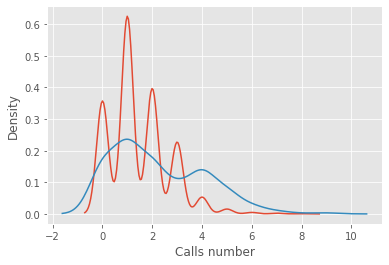

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
import numpy as np
%matplotlib inline

telecom_data = pd.read_csv('https://raw.githubusercontent.com/AVSirotkin/data_for_classes/master/telecom_churn.csv')

fig = sns.kdeplot(telecom_data[telecom_data['Churn'] == False]['Customer service calls'], label = 'Loyal')
fig = sns.kdeplot(telecom_data[telecom_data['Churn'] == True]['Customer service calls'], label = 'Churn')        
fig.set(xlabel='Calls number', ylabel='Density')    
plt.show()

As you may have noticed, the number of calls to the service center from loyal customers is less than from our former customers. Now it would be good to estimate how many calls each group makes on average. Since there is not enough data in our dataset, it is not entirely correct to look for the average, it is better to apply our new bootstrap knowledge. Let's generate 1000 new subsamples from our population and do an interval estimate of the mean.

In [2]:
import numpy as np
def get_bootstrap_samples(data, n_samples):
    # function to generate subsamples using bootstrap
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    # function for interval estimation
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# saving in separate numpy arrays data on loyal and already former customers
loyal_calls = telecom_data[telecom_data['Churn'] == False]['Customer service calls'].values
churn_calls= telecom_data[telecom_data['Churn'] == True]['Customer service calls'].values

# set a seed for reproducible results
np.random.seed(0)

# generate samples using bootstrap and immediately calculate the average for each of them
loyal_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(loyal_calls, 1000)]
churn_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(churn_calls, 1000)]

# display the interval estimate of the mean
print("Service calls from loyal:  mean interval",  stat_intervals(loyal_mean_scores, 0.05))
print("Service calls from churn:  mean interval",  stat_intervals(churn_mean_scores, 0.05))

Service calls from loyal:  mean interval [1.4077193  1.49473684]
Service calls from churn:  mean interval [2.0621118  2.39761905]



As a result, we got that with a 95% probability the average number of calls from loyal customers will lie between 1.40 and 1.50, while our former customers called on average from 2.06 to 2.40 times. You can also notice that the interval for loyal customers is narrower, which is quite logical, since they rarely call (mostly 0, 1 or 2 times), and dissatisfied customers will call much more often, but over time their patience will run out and they change operator.

### Bagging


Now that you have an idea about bootstrapping, we can move on to bagging. Let there be a training sample $\large X$. Using the bootstrap, we will generate $\large X_1, \dots, X_M$ samples from it. Now, on each sample, we will train our classifier $\large a_i(x)$. The final classifier will average the answers of all these algorithms (in the case of classification, this corresponds to voting): $\large a(x) = \frac{1}{M}\sum_{i = 1}^M a_i(x)$.

Consider a regression problem with basic algorithms $\large b_1(x), \dots , b_n(x)$. Assume that there is a true response function for all $\large y(x)$ objects, and a distribution on $\large p(x)$ objects is given. In this case, we can write down the error of each regression function $$ \large \varepsilon_i(x) = b_i(x) − y(x), i = 1, \dots, n$$
and write the mean squared error $$ \large E_x(b_i(x) − y(x))^{2} = E_x \varepsilon_i (x). $$

The average error of the constructed regression functions has the form $$ \large E_1 = \frac{1}{n}E_x \sum_{i=1}^n \varepsilon_i^{2}(x) $$

Assume that the errors are unbiased and uncorrelated:

$$ \large \begin{array}{rcl} E_x\varepsilon_i(x) &=& 0, \\
E_x\varepsilon_i(x)\varepsilon_j(x) &=& 0, i \neq j. \end{array}$$

Now let's build a new regression function that will average the answers of the functions we built:
$$ \large a(x) = \frac{1}{n}\sum_{i=1}^{n}b_i(x) $$

Find its root mean square error:
$$ \large \begin{array}{rcl}E_n &=& E_x\Big(\frac{1}{n}\sum_{i=1}^{n}b_i(x)-y(x)\Big)^2 \\
&=& E_x\Big(\frac{1}{n}\sum_{i=1}^{n}\varepsilon_i\Big)^2 \\
&=& \frac{1}{n^2}E_x\Big(\sum_{i=1}^{n}\varepsilon_i^2(x) + \sum_{i \neq j}\varepsilon_i(x)\varepsilon_j(x)\Big) \\
&=& \frac{1}{n}E_1\end{array}$$

Thus, averaging the answers made it possible to reduce the mean square of the error by n times!

General error:

$$\large \begin{array}{rcl} 
\text{Err}\left(\vec{x}\right) &=& \mathbb{E}\left[\left(y - \hat{f}\left(\vec{x}\right)\right)^2\right] \\
&=& \sigma^2 + f^2 + \text{Var}\left(\hat{f}\right) + \mathbb{E}\left[\hat{f}\right]^2 - 2f\mathbb{E}\left[\hat{f}\right] \\
&=& \left(f - \mathbb{E}\left[\hat{f}\right]\right)^2 + \text{Var}\left(\hat{f}\right) + \sigma^2 \\
&=& \text{Bias}\left(\hat{f}\right)^2 + \text{Var}\left(\hat{f}\right) + \sigma^2
\end{array}$$

Bagging allows you to reduce the variance (variance) of the trained classifier, reducing the amount by which the error will differ if the model is trained on different data sets, or in other words, it prevents overfitting. The efficiency of bagging is achieved due to the fact that the basic algorithms trained on different subsamples turn out to be quite different, and their errors are mutually compensated during voting, and also due to the fact that outlier objects may not fall into some training subsamples.

The `scikit-learn` library has an implementation of `BaggingRegressor` and `BaggingClassifier` that allows most other algorithms to be used "inside". Let's see how bagging works in practice and compare it with a decision tree using an example from [documentation](http://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble- plot-bias-variance-py).

Bagging is effective on small samples, when the exclusion of even a small part of training objects leads to the construction of significantly different base classifiers. In the case of large samples, subsamples of significantly smaller length are usually generated.